# Description

Runs gaussian mixture model on the pca version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

2

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=2
env: OPEN_BLAS_NUM_THREADS=2
env: NUMEXPR_NUM_THREADS=2
env: OMP_NUM_THREADS=2


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
np.random.seed(0)

In [6]:
INITIAL_RANDOM_STATE = 70000

## Input data

In [7]:
INPUT_SUBSET = "pca"

In [8]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [9]:
DR_OPTIONS = {
    "n_components": 50,
    "svd_solver": "full",
    "random_state": 0,
}

In [10]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/pca/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

'pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full'

## Clustering

In [11]:
from sklearn.mixture import GaussianMixture

In [12]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [13]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["N_INIT"] = 10
CLUSTERING_OPTIONS["COVARIANCE_TYPE"] = "full"

display(CLUSTERING_OPTIONS)

{'K_MIN': 2,
 'K_MAX': 60,
 'N_REPS_PER_K': 5,
 'N_INIT': 10,
 'COVARIANCE_TYPE': 'full'}

In [14]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = GaussianMixture(
            n_components=k,
            n_init=CLUSTERING_OPTIONS["N_INIT"],
            covariance_type=CLUSTERING_OPTIONS["COVARIANCE_TYPE"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [15]:
display(len(CLUSTERERS))

295

In [16]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('GaussianMixture #0',
 GaussianMixture(n_components=2, n_init=10, random_state=70000))

('GaussianMixture #1',
 GaussianMixture(n_components=2, n_init=10, random_state=70001))

In [17]:
clustering_method_name = method_name
display(clustering_method_name)

'GaussianMixture'

## Output directory

In [18]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_RUNS_DIR"],
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [19]:
data = pd.read_pickle(input_filepath)

In [20]:
data.shape

(3749, 50)

In [21]:
data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
100001_raw-Food_weight,-0.547515,-0.007250,0.245361,0.132424,1.201447,-0.113158,0.048859,1.031679,0.711208,0.126100,...,0.113685,-0.109753,0.178202,-0.487868,1.805920,-0.342611,-0.663712,-1.313987,-1.481707,0.396410
100002_raw-Energy,-1.570593,-0.618992,-1.223395,1.627321,-0.563860,0.224922,-1.500327,2.045633,-1.665998,-0.180432,...,0.697880,1.412676,2.103988,0.385625,2.386495,-2.939998,-0.978275,-1.893307,-0.259497,0.423264
100003_raw-Protein,-0.601212,-0.948824,-1.022209,2.438433,-2.062235,0.356202,-1.538038,2.314675,-1.108991,0.318034,...,0.171992,1.351979,0.054404,-0.725132,2.226520,-3.481674,-0.445294,-0.477452,0.237157,1.440867
100004_raw-Fat,-1.648214,-0.342042,-0.270189,1.683268,-1.222401,0.018349,-0.032824,1.671161,-0.908965,0.224100,...,-0.358812,0.696836,1.072624,0.627951,1.802000,0.174704,0.826319,-0.826992,0.596113,0.620050
100005_raw-Carbohydrate,-1.867586,-0.006412,-0.303220,0.770958,-0.116822,0.460946,-2.407732,1.534273,-1.930577,0.064621,...,1.332852,1.978032,2.158456,0.831123,1.093202,-3.539033,-0.831862,-0.842298,-0.723072,0.359438


In [22]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [23]:
from clustering.ensembles.utils import generate_ensemble

In [24]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 1/295 [00:01<07:12,  1.47s/it]

  1%|          | 2/295 [00:02<07:05,  1.45s/it]

  1%|          | 3/295 [00:04<07:08,  1.47s/it]

  1%|▏         | 4/295 [00:05<07:04,  1.46s/it]

  2%|▏         | 5/295 [00:07<07:01,  1.45s/it]

  2%|▏         | 6/295 [00:08<06:37,  1.38s/it]

  2%|▏         | 7/295 [00:09<06:01,  1.25s/it]

  3%|▎         | 8/295 [00:10<05:32,  1.16s/it]

  3%|▎         | 9/295 [00:11<05:10,  1.08s/it]

  3%|▎         | 10/295 [00:12<05:09,  1.09s/it]

  4%|▎         | 11/295 [00:13<05:07,  1.08s/it]

  4%|▍         | 12/295 [00:14<05:06,  1.08s/it]

  4%|▍         | 13/295 [00:15<05:00,  1.07s/it]

  5%|▍         | 14/295 [00:16<04:55,  1.05s/it]

  5%|▌         | 15/295 [00:17<04:50,  1.04s/it]

  5%|▌         | 16/295 [00:19<05:31,  1.19s/it]

  6%|▌         | 17/295 [00:20<05:48,  1.25s/it]

  6%|▌         | 18/295 [00:21<05:41,  1.23s/it]

  6%|▋         | 19/295 [00:23<06:22,  1.39s/it]

  7%|▋         | 20/295 [00:24<06:09,  1.34s/it]

  7%|▋         | 21/295 [00:26<06:27,  1.41s/it]

  7%|▋         | 22/295 [00:27<06:39,  1.46s/it]

  8%|▊         | 23/295 [00:29<07:01,  1.55s/it]

  8%|▊         | 24/295 [00:31<07:29,  1.66s/it]

  8%|▊         | 25/295 [00:33<07:34,  1.68s/it]

  9%|▉         | 26/295 [00:35<08:53,  1.98s/it]

  9%|▉         | 27/295 [00:38<09:14,  2.07s/it]

  9%|▉         | 28/295 [00:40<09:13,  2.07s/it]

 10%|▉         | 29/295 [00:43<10:04,  2.27s/it]

 10%|█         | 30/295 [00:45<09:46,  2.21s/it]

 11%|█         | 31/295 [00:48<10:50,  2.46s/it]

 11%|█         | 32/295 [00:50<10:47,  2.46s/it]

 11%|█         | 33/295 [00:53<11:01,  2.52s/it]

 12%|█▏        | 34/295 [00:55<11:10,  2.57s/it]

 12%|█▏        | 35/295 [00:58<11:36,  2.68s/it]

 12%|█▏        | 36/295 [01:03<13:59,  3.24s/it]

 13%|█▎        | 37/295 [01:07<14:44,  3.43s/it]

 13%|█▎        | 38/295 [01:10<14:53,  3.48s/it]

 13%|█▎        | 39/295 [01:16<16:59,  3.98s/it]

 14%|█▎        | 40/295 [01:18<15:32,  3.66s/it]

 14%|█▍        | 41/295 [01:23<16:32,  3.91s/it]

 14%|█▍        | 42/295 [01:28<18:01,  4.27s/it]

 15%|█▍        | 43/295 [01:34<19:57,  4.75s/it]

 15%|█▍        | 44/295 [01:39<20:20,  4.86s/it]

 15%|█▌        | 45/295 [01:43<19:04,  4.58s/it]

 16%|█▌        | 46/295 [01:47<18:51,  4.54s/it]

 16%|█▌        | 47/295 [01:54<21:29,  5.20s/it]

 16%|█▋        | 48/295 [02:00<22:08,  5.38s/it]

 17%|█▋        | 49/295 [02:04<20:57,  5.11s/it]

 17%|█▋        | 50/295 [02:13<25:09,  6.16s/it]

 17%|█▋        | 51/295 [02:22<29:02,  7.14s/it]

 18%|█▊        | 52/295 [02:29<28:42,  7.09s/it]

 18%|█▊        | 53/295 [02:35<26:27,  6.56s/it]

 18%|█▊        | 54/295 [02:42<26:34,  6.61s/it]

 19%|█▊        | 55/295 [02:51<29:53,  7.47s/it]

 19%|█▉        | 56/295 [03:03<34:38,  8.70s/it]

 19%|█▉        | 57/295 [03:13<36:21,  9.17s/it]

 20%|█▉        | 58/295 [03:22<36:01,  9.12s/it]

 20%|██        | 59/295 [03:30<34:38,  8.81s/it]

 20%|██        | 60/295 [03:36<30:45,  7.85s/it]

 21%|██        | 61/295 [03:50<38:24,  9.85s/it]

 21%|██        | 62/295 [04:01<39:37, 10.20s/it]

 21%|██▏       | 63/295 [04:12<40:16, 10.42s/it]

 22%|██▏       | 64/295 [04:21<38:32, 10.01s/it]

 22%|██▏       | 65/295 [04:32<39:00, 10.18s/it]

 22%|██▏       | 66/295 [04:45<42:22, 11.10s/it]

 23%|██▎       | 67/295 [04:54<39:48, 10.48s/it]

 23%|██▎       | 68/295 [05:03<37:42,  9.97s/it]

 23%|██▎       | 69/295 [05:13<38:23, 10.19s/it]

 24%|██▎       | 70/295 [05:25<39:44, 10.60s/it]

 24%|██▍       | 71/295 [05:40<45:01, 12.06s/it]

 24%|██▍       | 72/295 [05:58<51:25, 13.84s/it]

 25%|██▍       | 73/295 [06:10<49:08, 13.28s/it]

 25%|██▌       | 74/295 [06:24<49:47, 13.52s/it]

 25%|██▌       | 75/295 [06:40<52:02, 14.20s/it]

 26%|██▌       | 76/295 [06:56<53:27, 14.65s/it]

 26%|██▌       | 77/295 [07:14<57:09, 15.73s/it]

 26%|██▋       | 78/295 [07:25<51:58, 14.37s/it]

 27%|██▋       | 79/295 [07:44<56:28, 15.69s/it]

 27%|██▋       | 80/295 [08:02<58:03, 16.20s/it]

 27%|██▋       | 81/295 [08:21<1:01:22, 17.21s/it]

 28%|██▊       | 82/295 [08:40<1:03:04, 17.77s/it]

 28%|██▊       | 83/295 [08:58<1:02:50, 17.78s/it]

 28%|██▊       | 84/295 [09:17<1:03:32, 18.07s/it]

 29%|██▉       | 85/295 [09:37<1:05:52, 18.82s/it]

 29%|██▉       | 86/295 [09:56<1:05:46, 18.88s/it]

 29%|██▉       | 87/295 [10:18<1:07:59, 19.61s/it]

 30%|██▉       | 88/295 [10:40<1:10:38, 20.47s/it]

 30%|███       | 89/295 [11:03<1:13:09, 21.31s/it]

 31%|███       | 90/295 [11:27<1:14:54, 21.92s/it]

 31%|███       | 91/295 [11:55<1:21:03, 23.84s/it]

 31%|███       | 92/295 [12:17<1:18:46, 23.28s/it]

 32%|███▏      | 93/295 [12:41<1:18:58, 23.46s/it]

 32%|███▏      | 94/295 [13:07<1:20:52, 24.14s/it]

 32%|███▏      | 95/295 [13:33<1:22:54, 24.87s/it]

 33%|███▎      | 96/295 [14:04<1:28:01, 26.54s/it]

 33%|███▎      | 97/295 [14:25<1:22:49, 25.10s/it]

 33%|███▎      | 98/295 [14:51<1:23:20, 25.38s/it]

 34%|███▎      | 99/295 [15:16<1:21:39, 25.00s/it]

 34%|███▍      | 100/295 [15:37<1:17:38, 23.89s/it]

 34%|███▍      | 101/295 [16:07<1:23:13, 25.74s/it]

 35%|███▍      | 102/295 [16:36<1:25:56, 26.72s/it]

 35%|███▍      | 103/295 [17:02<1:25:04, 26.59s/it]

 35%|███▌      | 104/295 [17:37<1:32:30, 29.06s/it]

 36%|███▌      | 105/295 [18:05<1:30:41, 28.64s/it]

 36%|███▌      | 106/295 [18:37<1:34:08, 29.89s/it]

 36%|███▋      | 107/295 [19:06<1:31:55, 29.34s/it]

 37%|███▋      | 108/295 [19:35<1:31:15, 29.28s/it]

 37%|███▋      | 109/295 [20:01<1:28:09, 28.44s/it]

 37%|███▋      | 110/295 [20:33<1:31:05, 29.54s/it]

 38%|███▊      | 111/295 [21:04<1:31:15, 29.76s/it]

 38%|███▊      | 112/295 [21:33<1:30:18, 29.61s/it]

 38%|███▊      | 113/295 [22:06<1:33:08, 30.70s/it]

 39%|███▊      | 114/295 [22:37<1:32:38, 30.71s/it]

 39%|███▉      | 115/295 [23:11<1:35:42, 31.90s/it]

 39%|███▉      | 116/295 [23:46<1:37:34, 32.71s/it]

 40%|███▉      | 117/295 [24:20<1:37:53, 33.00s/it]

 40%|████      | 118/295 [24:52<1:36:50, 32.83s/it]

 40%|████      | 119/295 [25:28<1:39:20, 33.86s/it]

 41%|████      | 120/295 [26:08<1:43:55, 35.63s/it]

 41%|████      | 121/295 [26:43<1:42:28, 35.34s/it]

 41%|████▏     | 122/295 [27:19<1:42:38, 35.60s/it]

 42%|████▏     | 123/295 [27:59<1:45:59, 36.97s/it]

 42%|████▏     | 124/295 [28:36<1:44:53, 36.80s/it]

 42%|████▏     | 125/295 [29:14<1:45:32, 37.25s/it]

 43%|████▎     | 126/295 [29:59<1:51:24, 39.55s/it]

 43%|████▎     | 127/295 [30:33<1:45:56, 37.84s/it]

 43%|████▎     | 128/295 [31:11<1:45:52, 38.04s/it]

 44%|████▎     | 129/295 [31:53<1:48:03, 39.06s/it]

 44%|████▍     | 130/295 [32:30<1:45:56, 38.53s/it]

 44%|████▍     | 131/295 [33:10<1:46:30, 38.97s/it]

 45%|████▍     | 132/295 [33:49<1:46:11, 39.09s/it]

 45%|████▌     | 133/295 [34:30<1:46:58, 39.62s/it]

 45%|████▌     | 134/295 [35:09<1:45:55, 39.47s/it]

 46%|████▌     | 135/295 [35:53<1:48:37, 40.73s/it]

 46%|████▌     | 136/295 [36:35<1:49:08, 41.19s/it]

 46%|████▋     | 137/295 [37:11<1:44:08, 39.55s/it]

 47%|████▋     | 138/295 [37:56<1:47:59, 41.27s/it]

 47%|████▋     | 139/295 [38:36<1:45:56, 40.75s/it]

 47%|████▋     | 140/295 [39:21<1:48:24, 41.96s/it]

 48%|████▊     | 141/295 [40:05<1:49:29, 42.66s/it]

 48%|████▊     | 142/295 [40:50<1:50:37, 43.38s/it]

 48%|████▊     | 143/295 [41:37<1:53:00, 44.61s/it]

 49%|████▉     | 144/295 [42:21<1:51:49, 44.43s/it]

 49%|████▉     | 145/295 [43:04<1:49:46, 43.91s/it]

 49%|████▉     | 146/295 [43:46<1:47:47, 43.41s/it]

 50%|████▉     | 147/295 [44:29<1:46:17, 43.09s/it]

 50%|█████     | 148/295 [45:17<1:49:08, 44.55s/it]

 51%|█████     | 149/295 [46:00<1:47:29, 44.18s/it]

 51%|█████     | 150/295 [46:50<1:51:01, 45.94s/it]

 51%|█████     | 151/295 [47:38<1:51:53, 46.62s/it]

 52%|█████▏    | 152/295 [48:31<1:55:53, 48.63s/it]

 52%|█████▏    | 153/295 [49:19<1:54:16, 48.29s/it]

 52%|█████▏    | 154/295 [50:11<1:56:24, 49.53s/it]

 53%|█████▎    | 155/295 [51:09<2:01:06, 51.90s/it]

 53%|█████▎    | 156/295 [52:01<2:00:32, 52.04s/it]

 53%|█████▎    | 157/295 [52:47<1:55:40, 50.29s/it]

 54%|█████▎    | 158/295 [53:38<1:55:19, 50.51s/it]

 54%|█████▍    | 159/295 [54:25<1:51:43, 49.29s/it]

 54%|█████▍    | 160/295 [55:22<1:56:00, 51.56s/it]

 55%|█████▍    | 161/295 [56:12<1:54:21, 51.21s/it]

 55%|█████▍    | 162/295 [57:02<1:52:42, 50.84s/it]

 55%|█████▌    | 163/295 [57:51<1:50:23, 50.18s/it]

 56%|█████▌    | 164/295 [58:45<1:52:08, 51.36s/it]

 56%|█████▌    | 165/295 [59:34<1:49:51, 50.70s/it]

 56%|█████▋    | 166/295 [1:00:26<1:49:57, 51.14s/it]

 57%|█████▋    | 167/295 [1:01:24<1:53:19, 53.12s/it]

 57%|█████▋    | 168/295 [1:02:10<1:47:50, 50.95s/it]

 57%|█████▋    | 169/295 [1:03:04<1:49:03, 51.93s/it]

 58%|█████▊    | 170/295 [1:04:03<1:52:17, 53.90s/it]

 58%|█████▊    | 171/295 [1:04:50<1:47:15, 51.90s/it]

 58%|█████▊    | 172/295 [1:05:41<1:45:53, 51.65s/it]

 59%|█████▊    | 173/295 [1:06:35<1:46:35, 52.42s/it]

 59%|█████▉    | 174/295 [1:07:30<1:47:18, 53.21s/it]

 59%|█████▉    | 175/295 [1:08:22<1:45:36, 52.80s/it]

 60%|█████▉    | 176/295 [1:09:16<1:45:19, 53.10s/it]

 60%|██████    | 177/295 [1:10:09<1:44:32, 53.15s/it]

 60%|██████    | 178/295 [1:11:04<1:44:38, 53.67s/it]

 61%|██████    | 179/295 [1:12:03<1:46:59, 55.34s/it]

 61%|██████    | 180/295 [1:12:59<1:46:21, 55.49s/it]

 61%|██████▏   | 181/295 [1:13:49<1:42:17, 53.83s/it]

 62%|██████▏   | 182/295 [1:14:51<1:45:56, 56.25s/it]

 62%|██████▏   | 183/295 [1:15:39<1:40:11, 53.67s/it]

 62%|██████▏   | 184/295 [1:16:38<1:42:26, 55.37s/it]

 63%|██████▎   | 185/295 [1:17:36<1:43:09, 56.27s/it]

 63%|██████▎   | 186/295 [1:18:38<1:45:23, 58.01s/it]

 63%|██████▎   | 187/295 [1:19:30<1:40:45, 55.98s/it]

 64%|██████▎   | 188/295 [1:20:21<1:37:35, 54.72s/it]

 64%|██████▍   | 189/295 [1:21:12<1:34:40, 53.59s/it]

 64%|██████▍   | 190/295 [1:22:14<1:38:05, 56.05s/it]

 65%|██████▍   | 191/295 [1:23:19<1:41:50, 58.76s/it]

 65%|██████▌   | 192/295 [1:24:18<1:40:49, 58.73s/it]

 65%|██████▌   | 193/295 [1:25:15<1:38:50, 58.15s/it]

 66%|██████▌   | 194/295 [1:26:14<1:38:39, 58.61s/it]

 66%|██████▌   | 195/295 [1:27:04<1:33:07, 55.87s/it]

 66%|██████▋   | 196/295 [1:28:04<1:34:20, 57.17s/it]

 67%|██████▋   | 197/295 [1:29:05<1:35:10, 58.27s/it]

 67%|██████▋   | 198/295 [1:30:03<1:34:11, 58.26s/it]

 67%|██████▋   | 199/295 [1:31:07<1:35:50, 59.90s/it]

 68%|██████▊   | 200/295 [1:31:58<1:30:48, 57.35s/it]

 68%|██████▊   | 201/295 [1:32:56<1:29:53, 57.38s/it]

 68%|██████▊   | 202/295 [1:33:50<1:27:36, 56.52s/it]

 69%|██████▉   | 203/295 [1:34:46<1:26:30, 56.41s/it]

 69%|██████▉   | 204/295 [1:35:38<1:23:33, 55.09s/it]

 69%|██████▉   | 205/295 [1:36:42<1:26:23, 57.59s/it]

 70%|██████▉   | 206/295 [1:37:40<1:25:32, 57.67s/it]

 70%|███████   | 207/295 [1:38:39<1:25:13, 58.11s/it]

 71%|███████   | 208/295 [1:39:51<1:30:25, 62.36s/it]

 71%|███████   | 209/295 [1:40:53<1:29:15, 62.28s/it]

 71%|███████   | 210/295 [1:41:59<1:29:36, 63.26s/it]

 72%|███████▏  | 211/295 [1:43:01<1:28:10, 62.99s/it]

 72%|███████▏  | 212/295 [1:43:54<1:22:49, 59.88s/it]

 72%|███████▏  | 213/295 [1:44:54<1:22:10, 60.12s/it]

 73%|███████▎  | 214/295 [1:45:54<1:21:08, 60.11s/it]

 73%|███████▎  | 215/295 [1:46:51<1:18:44, 59.05s/it]

 73%|███████▎  | 216/295 [1:47:52<1:18:23, 59.53s/it]

 74%|███████▎  | 217/295 [1:48:47<1:15:38, 58.18s/it]

 74%|███████▍  | 218/295 [1:49:43<1:13:58, 57.65s/it]

 74%|███████▍  | 219/295 [1:50:46<1:15:07, 59.31s/it]

 75%|███████▍  | 220/295 [1:51:44<1:13:28, 58.78s/it]

 75%|███████▍  | 221/295 [1:52:52<1:16:08, 61.74s/it]

 75%|███████▌  | 222/295 [1:53:53<1:14:32, 61.27s/it]

 76%|███████▌  | 223/295 [1:54:55<1:13:49, 61.52s/it]

 76%|███████▌  | 224/295 [1:55:47<1:09:33, 58.77s/it]

 76%|███████▋  | 225/295 [1:56:55<1:11:44, 61.50s/it]

 77%|███████▋  | 226/295 [1:57:57<1:10:59, 61.74s/it]

 77%|███████▋  | 227/295 [1:59:10<1:13:39, 65.00s/it]

 77%|███████▋  | 228/295 [2:00:15<1:12:42, 65.11s/it]

 78%|███████▊  | 229/295 [2:01:10<1:08:04, 61.89s/it]

 78%|███████▊  | 230/295 [2:02:09<1:06:20, 61.24s/it]

 78%|███████▊  | 231/295 [2:03:08<1:04:40, 60.63s/it]

 79%|███████▊  | 232/295 [2:04:15<1:05:25, 62.31s/it]

 79%|███████▉  | 233/295 [2:05:16<1:03:58, 61.91s/it]

 79%|███████▉  | 234/295 [2:06:23<1:04:35, 63.53s/it]

 80%|███████▉  | 235/295 [2:07:24<1:02:42, 62.71s/it]

 80%|████████  | 236/295 [2:08:29<1:02:26, 63.51s/it]

 80%|████████  | 237/295 [2:09:23<58:38, 60.66s/it]  

 81%|████████  | 238/295 [2:10:20<56:25, 59.39s/it]

 81%|████████  | 239/295 [2:11:26<57:15, 61.35s/it]

 81%|████████▏ | 240/295 [2:12:21<54:43, 59.70s/it]

 82%|████████▏ | 241/295 [2:13:28<55:35, 61.77s/it]

 82%|████████▏ | 242/295 [2:14:27<53:56, 61.06s/it]

 82%|████████▏ | 243/295 [2:15:23<51:34, 59.51s/it]

 83%|████████▎ | 244/295 [2:16:28<51:49, 60.97s/it]

 83%|████████▎ | 245/295 [2:17:29<50:52, 61.04s/it]

 83%|████████▎ | 246/295 [2:18:30<49:53, 61.09s/it]

 84%|████████▎ | 247/295 [2:19:30<48:42, 60.89s/it]

 84%|████████▍ | 248/295 [2:20:34<48:25, 61.82s/it]

 84%|████████▍ | 249/295 [2:21:38<47:41, 62.21s/it]

 85%|████████▍ | 250/295 [2:22:41<47:02, 62.71s/it]

 85%|████████▌ | 251/295 [2:23:42<45:24, 61.92s/it]

 85%|████████▌ | 252/295 [2:24:41<43:51, 61.20s/it]

 86%|████████▌ | 253/295 [2:25:42<42:48, 61.14s/it]

 86%|████████▌ | 254/295 [2:26:45<42:10, 61.72s/it]

 86%|████████▋ | 255/295 [2:27:48<41:28, 62.21s/it]

 87%|████████▋ | 256/295 [2:28:56<41:26, 63.76s/it]

 87%|████████▋ | 257/295 [2:30:00<40:24, 63.81s/it]

 87%|████████▋ | 258/295 [2:30:58<38:15, 62.04s/it]

 88%|████████▊ | 259/295 [2:31:54<36:07, 60.21s/it]

 88%|████████▊ | 260/295 [2:32:50<34:29, 59.14s/it]

 88%|████████▊ | 261/295 [2:33:47<33:05, 58.40s/it]

 89%|████████▉ | 262/295 [2:34:53<33:18, 60.55s/it]

 89%|████████▉ | 263/295 [2:35:53<32:17, 60.56s/it]

 89%|████████▉ | 264/295 [2:36:55<31:26, 60.85s/it]

 90%|████████▉ | 265/295 [2:37:56<30:25, 60.86s/it]

 90%|█████████ | 266/295 [2:38:57<29:28, 60.99s/it]

 91%|█████████ | 267/295 [2:39:55<28:07, 60.27s/it]

 91%|█████████ | 268/295 [2:40:58<27:25, 60.95s/it]

 91%|█████████ | 269/295 [2:42:02<26:51, 61.96s/it]

 92%|█████████▏| 270/295 [2:43:01<25:24, 60.98s/it]

 92%|█████████▏| 271/295 [2:44:02<24:26, 61.11s/it]

 92%|█████████▏| 272/295 [2:45:00<23:04, 60.19s/it]

 93%|█████████▎| 273/295 [2:46:08<22:50, 62.31s/it]

 93%|█████████▎| 274/295 [2:47:10<21:47, 62.26s/it]

 93%|█████████▎| 275/295 [2:48:15<21:04, 63.23s/it]

 94%|█████████▎| 276/295 [2:49:18<19:59, 63.12s/it]

 94%|█████████▍| 277/295 [2:50:23<19:04, 63.56s/it]

 94%|█████████▍| 278/295 [2:51:23<17:42, 62.52s/it]

 95%|█████████▍| 279/295 [2:52:31<17:09, 64.36s/it]

 95%|█████████▍| 280/295 [2:53:36<16:07, 64.51s/it]

 95%|█████████▌| 281/295 [2:54:31<14:21, 61.52s/it]

 96%|█████████▌| 282/295 [2:55:46<14:13, 65.66s/it]

 96%|█████████▌| 283/295 [2:56:52<13:08, 65.75s/it]

 96%|█████████▋| 284/295 [2:57:48<11:31, 62.84s/it]

 97%|█████████▋| 285/295 [2:58:52<10:32, 63.26s/it]

 97%|█████████▋| 286/295 [2:59:55<09:28, 63.15s/it]

 97%|█████████▋| 287/295 [3:00:53<08:12, 61.54s/it]

 98%|█████████▊| 288/295 [3:02:09<07:41, 65.97s/it]

 98%|█████████▊| 289/295 [3:03:16<06:36, 66.04s/it]

 98%|█████████▊| 290/295 [3:04:22<05:30, 66.12s/it]

 99%|█████████▊| 291/295 [3:05:38<04:36, 69.01s/it]

 99%|█████████▉| 292/295 [3:06:44<03:24, 68.10s/it]

 99%|█████████▉| 293/295 [3:07:45<02:12, 66.08s/it]

100%|█████████▉| 294/295 [3:08:47<01:04, 64.91s/it]

100%|██████████| 295/295 [3:09:55<00:00, 65.89s/it]

100%|██████████| 295/295 [3:09:55<00:00, 38.63s/it]

In [25]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [26]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2


In [27]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [28]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [29]:
assert ensemble_stats["min"] > 1

In [30]:
assert not ensemble["n_clusters"].isna().any()

In [31]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [32]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [33]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [34]:
from sklearn.metrics import calinski_harabasz_score

In [35]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [36]:
ensemble.shape

(295, 4)

In [37]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,619.178049
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,619.178049
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,619.178049
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,619.178049
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,619.178049


## Save

In [38]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [39]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [40]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,619.178049
3,572.633555
4,530.338410
5,440.550601
6,388.565716
7,350.611874
8,334.589998
9,310.559970
10,295.282109


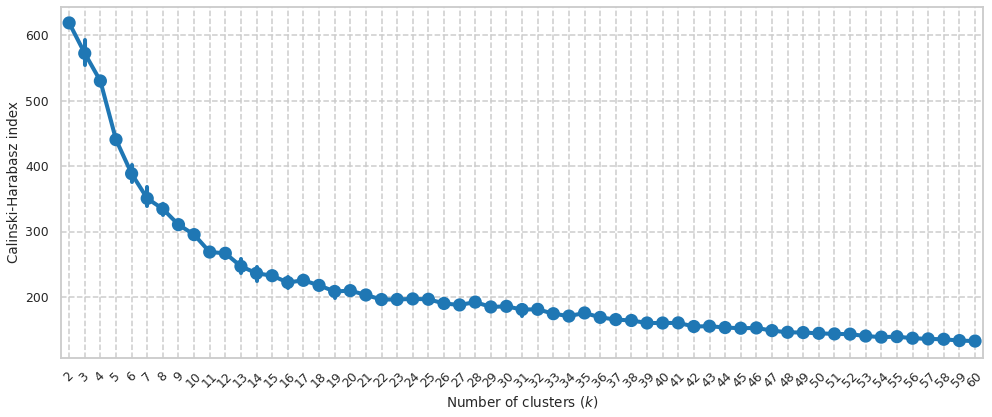

In [41]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [42]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [43]:
parts.head()

n_clusters
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
5    [[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,...
6    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
dtype: object

In [44]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [45]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [46]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [47]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

2     1.000000
4     0.994182
5     0.992584
7     0.944322
10    0.937556
6     0.922867
8     0.911643
3     0.855784
11    0.830593
9     0.798840
12    0.771361
13    0.683191
17    0.626926
15    0.623425
14    0.580949
Name: k, dtype: float64

In [48]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [49]:
parts_ari_df.shape

(59, 10)

In [50]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [51]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.886596,1.000000,0.793980,0.913928,0.886596,0.693142,0.958559,0.793980,0.913928,0.717135
4,1.000000,0.990304,0.990304,0.990304,0.990304,0.990304,0.990304,1.000000,1.000000,1.000000
5,1.000000,1.000000,0.987526,0.987866,1.000000,0.987526,0.987866,0.987526,0.987866,0.999660
6,0.979591,0.983467,0.850934,0.963322,0.965789,0.833657,0.956219,0.860968,0.971600,0.863120


## Save

In [52]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-stability-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [53]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [54]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [55]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [56]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,1.0
1,2,1,1.0
2,2,2,1.0
3,2,3,1.0
4,2,4,1.0


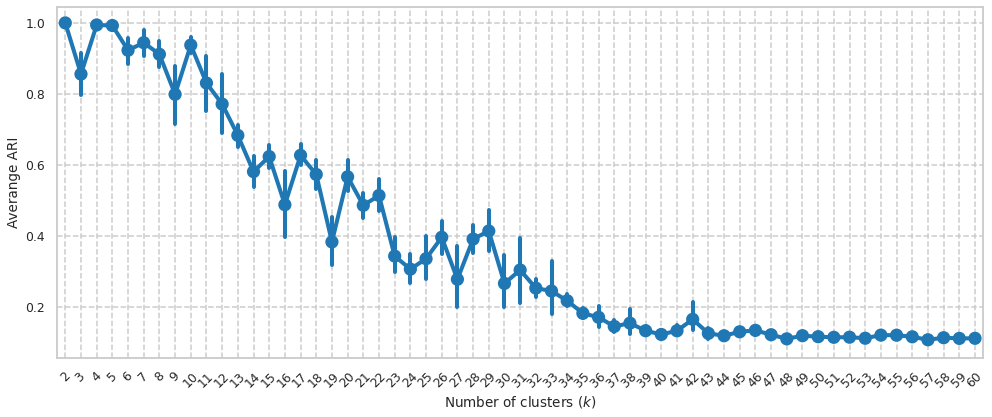

In [57]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()